# MBA 706:  Data Analytics - Ford Ka Case Clustering Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# suppress warnings
pd.options.mode.chained_assignment = None

In [2]:
# import dataset
#data = pd.read_excel('/Users/seanolson/OneDrive/Documents/UNC Chapel Hill/Kenan-Flagler Business School/KFBS Courses/MBA706 Data Analytics/Week 3/6.9+Ford+Ka+Data.xls', sheet_name = 'Data')
#data = pd.read_excel('C:/Users/600795/Downloads/6.9+Ford+Ka+Data.xls', sheet_name = 'Data')
data = pd.read_excel('G:/OneDrive/Documents/UNC Chapel Hill/Kenan-Flagler Business School/KFBS Courses/MBA706 Data Analytics/Week 3/6.9+Ford+Ka+Data.xls', sheet_name = 'Data')
display(data.head())

,Respondent,Emotion,Idealism,Realism,Freedom,Reliability,Preference Group,Gender,Age,Marital Status,Number of Children,1st Time Purchase,Income Category
0,1,4.000000,5.250,4.0,4.50,4.0,Chooser,Female,44,Single,0,No,6
1,2,5.916667,3.875,4.0,3.25,4.0,Middle,Male,24,Living Together,1,Yes,3
2,3,3.416667,2.500,5.4,4.50,4.0,Non Chooser,Female,34,Single,1,No,1
3,4,3.166667,5.250,4.1,4.50,3.8,Middle,Male,44,Single,0,No,3
4,5,3.916667,3.000,6.2,4.50,4.0,Chooser,Female,41,Married,2,Yes,4


In [3]:
# convert string variables into categorical variables
# Preference Group: 0 = Non Chooser, 1 = Middle, 2 = Chooser
# Gender: 0 = Female, 1 = Male
# Marital Status: 0 = Single, 1 = Living Together, 2 = Married
# 1st Time Purchase: 0 = No, 1 = Yes
data['pref_group_cat'] = 0
data['gender_cat'] = 0
data['marital_cat'] = 0
data['first_pur_cat'] = 0

for i in range(0, len(data)):
    if data['Preference Group'][i] == 'Middle':
        data['pref_group_cat'][i] = 1
    elif data['Preference Group'][i] == 'Chooser':
        data['pref_group_cat'][i] = 2
        
    if data['Gender'][i] == 'Male':
        data['gender_cat'][i] = 1
        
    if data['Marital Status'][i] == 'Living Together':
        data['marital_cat'][i] = 1
    elif data['Marital Status'][i] == 'Married':
        data['marital_cat'][i] = 2
        
    if data['1st Time Purchase'][i] == 'Yes':
        data['first_pur_cat'][i] = 1
        
data = data.drop(['Preference Group', 'Gender', 'Marital Status', '1st Time Purchase'], axis = 1)
data = data.rename(columns = {'pref_group_cat': 'Preference Group', 'gender_cat': 'Gender', 'marital_cat': 'Marital Status', 'first_pur_cat': '1st Time Purchase'})

print(data.isnull().sum())
print('')
display(data.head())

Respondent            0
Emotion               0
Idealism              0
Realism               0
Freedom               0
Reliability           0
Age                   0
Number of Children    0
Income Category       0
Preference Group      0
Gender                0
Marital Status        0
1st Time Purchase     0
dtype: int64



,Respondent,Emotion,Idealism,Realism,Freedom,Reliability,Age,Number of Children,Income Category,Preference Group,Gender,Marital Status,1st Time Purchase
0,1,4.000000,5.250,4.0,4.50,4.0,44,0,6,2,0,0,0
1,2,5.916667,3.875,4.0,3.25,4.0,24,1,3,1,1,1,1
2,3,3.416667,2.500,5.4,4.50,4.0,34,1,1,0,0,0,0
3,4,3.166667,5.250,4.1,4.50,3.8,44,0,3,1,1,0,0
4,5,3.916667,3.000,6.2,4.50,4.0,41,2,4,2,0,2,1


In [4]:
# make copy of data and parse
cldata = data.copy()

# parse data
cldata = cldata.drop(['Respondent', 'Age', 'Number of Children', 'Income Category', 'Preference Group', 'Gender', 'Marital Status', '1st Time Purchase'], axis = 1)

# confirm counts of nulls
print(cldata.isnull().sum())
print('')
display(cldata.head())

Emotion        0
Idealism       0
Realism        0
Freedom        0
Reliability    0
dtype: int64



,Emotion,Idealism,Realism,Freedom,Reliability
0,4.000000,5.250,4.0,4.50,4.0
1,5.916667,3.875,4.0,3.25,4.0
2,3.416667,2.500,5.4,4.50,4.0
3,3.166667,5.250,4.1,4.50,3.8
4,3.916667,3.000,6.2,4.50,4.0


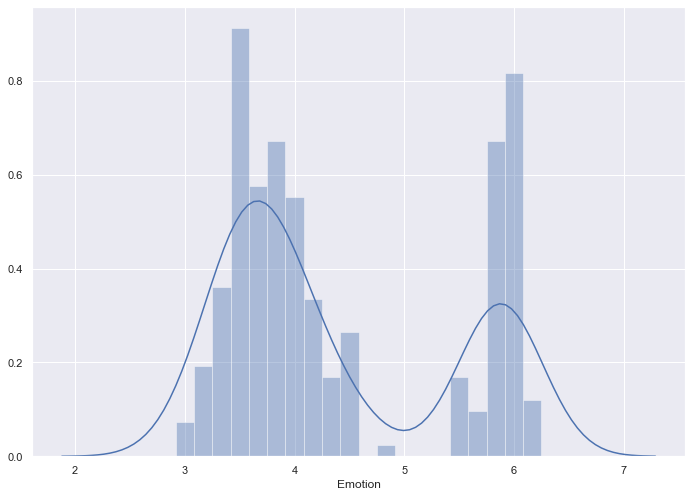

In [5]:
# Clustering setup: plot distribtution of these attitudinal charts
# Data Visualization: Emotion
# set the size of the figure
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# histogram showing the distribution of the target (spend) values
sns.distplot(cldata['Emotion'], bins = 20)
plt.show()

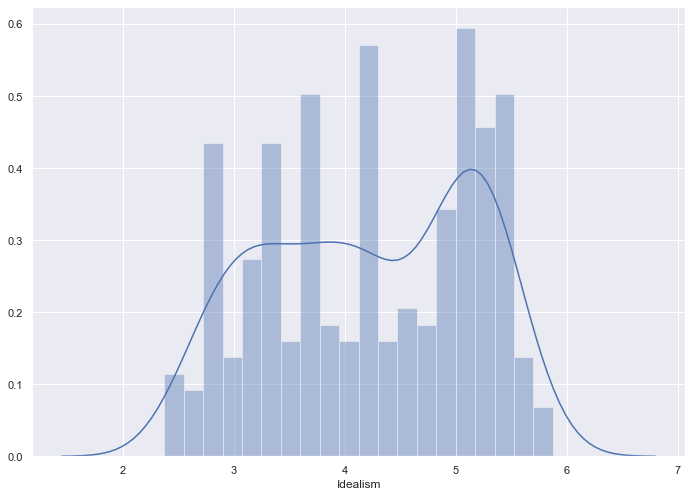

In [6]:
# Data Visualization: Idealism
# set the size of the figure
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# histogram showing the distribution of the target (spend) values
sns.distplot(cldata['Idealism'], bins = 20)
plt.show()

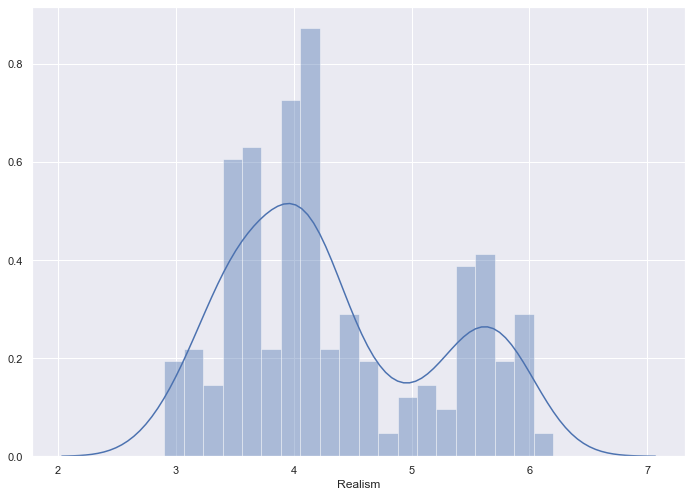

In [7]:
# Data Visualization: Realism
# set the size of the figure
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# histogram showing the distribution of the target (spend) values
sns.distplot(cldata['Realism'], bins = 20)
plt.show()

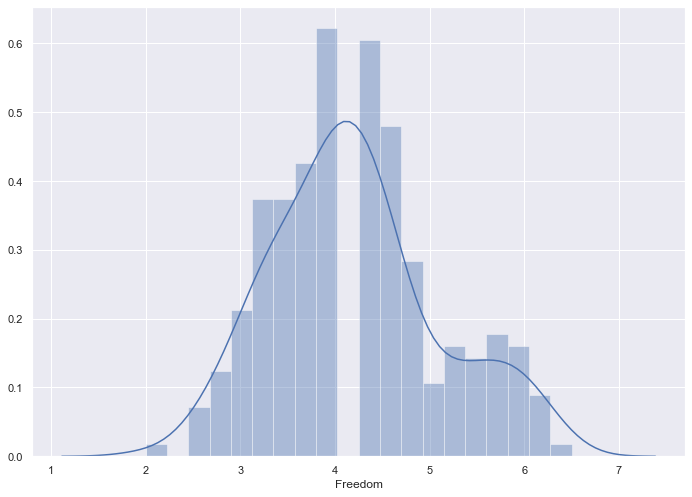

In [8]:
# Data Visualization: Freedom
# set the size of the figure
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# histogram showing the distribution of the target (spend) values
sns.distplot(cldata['Freedom'], bins = 20)
plt.show()

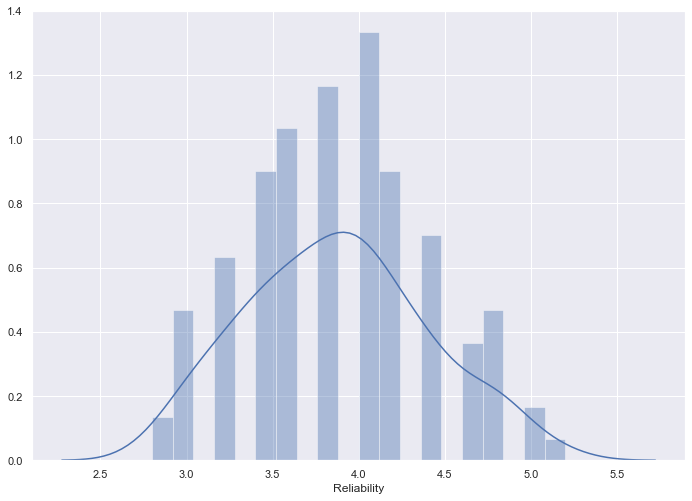

In [9]:
# Data Visualization: Reliability
# set the size of the figure
sns.set(rc = {'figure.figsize':(11.7, 8.27)})

# histogram showing the distribution of the target (spend) values
sns.distplot(cldata['Reliability'], bins = 20)
plt.show()

#### Given no significant outliers in the data we can move onto the clustering analysis.
#### There are three types of clustering algorithms we can use:
- **K-means clustering**:  great for spherical data and can handle outliers well, can use elbow analysis to determine optimal number of clusters
- **Hierarchical clustering**:  is good for  non-spherical data, but is extremely sensitive to outliers, though doesn't need to specify the clusters
- **DBSCAN**:  doesn't need to specify the clusters, high flexibility in shapes and sizes of the clusters, faces difficulty  with classifying border points

#### Given that our data will have a few border points it is probably best to use either K-means or Hierarchical and since Hierarchical is computationally intensive, a K-means analysis would be preferred.

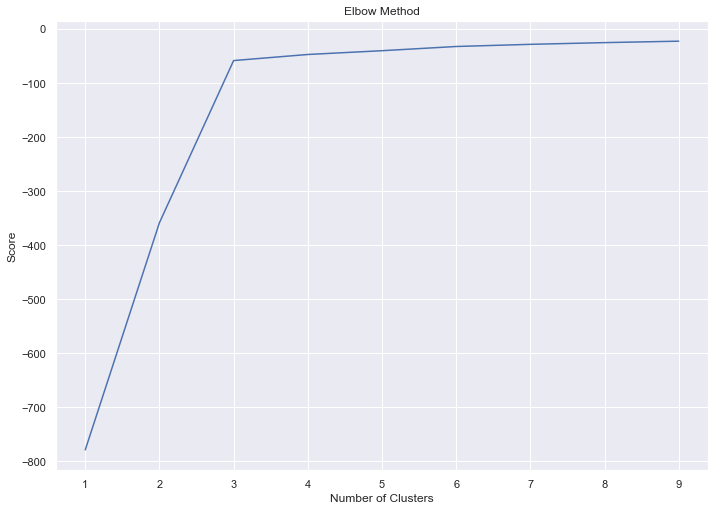

In [10]:
# Use Elbow Method to determine optimal number of clusters
# create array from dataframe
X = np.array(cldata)

# run PCA to be able to analyze in two dimensions
sklearn_pca = PCA(n_components = 2)
y = sklearn_pca.fit_transform(X)

# Determine range of clusters to test
number_clusters = range(1, 10)

# fit range of clusters
km = [KMeans(n_clusters = i, max_iter = 600) for i in number_clusters]

# generate cluster score
score = [km[i].fit(y).score(y) for i in range(len(km))]

# plot
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

#### According to the Elbow Method either 3 or 4 would be the ideal number of clusters to portion the respondents, we will go with 3 to start and then move to 4 if the analysis doesn't prove fruitful.

In [11]:
# K-means Clustering Analysis
kmeans = KMeans(n_clusters = 3, max_iter = 600)
y_fit = kmeans.fit(X)
y_kmfit = kmeans.predict(X)
kmlabels = kmeans.labels_

# print cluster centers
kmcenter = kmeans.cluster_centers_
#print('K-means cluster centers: {}'.format(kmcenter))
cldict = {'Clusters': [1, 2, 3], 'Emotion Center': [kmcenter[0][0], kmcenter[1][0], kmcenter[2][0]],
          'Idealism Center': [kmcenter[0][1], kmcenter[1][1], kmcenter[2][1]],
          'Realism Center': [kmcenter[0][2], kmcenter[1][2], kmcenter[2][2]],
          'Freedom Center': [kmcenter[0][3], kmcenter[1][3], kmcenter[2][3]],
          'Reliability Center': [kmcenter[0][4], kmcenter[1][4], kmcenter[2][4]]}
cldf = pd.DataFrame.from_dict(cldict)
display(cldf)

,Clusters,Emotion Center,Idealism Center,Realism Center,Freedom Center,Reliability Center
0,1,3.602564,3.030769,5.621538,4.019231,3.901538
1,2,5.875000,3.948718,3.496154,3.397436,3.538462
2,3,3.807632,5.137850,4.168224,4.908879,4.110280


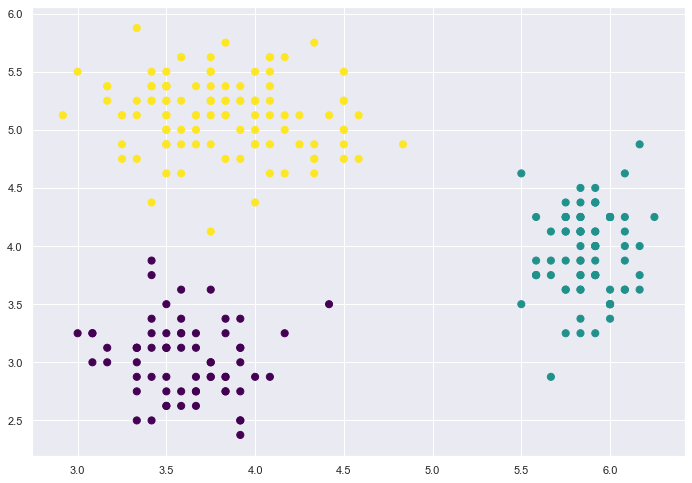

In [15]:
# plot it
plt.scatter(X[:, 0], X[:, 1], c = y_kmfit, s = 50, cmap = 'viridis')

In [16]:
# add cluster index (starting at 1) back to original dataframe
kmindex = kmlabels + 1

# create column
data['Cluster'] = 0

for i in range(0, len(data)):
    data['Cluster'][i] = kmindex[i]

data.head()

,Respondent,Emotion,Idealism,Realism,Freedom,Reliability,Age,Number of Children,Income Category,Preference Group,Gender,Marital Status,1st Time Purchase,Cluster
0,1,4.000000,5.250,4.0,4.50,4.0,44,0,6,2,0,0,0,3
1,2,5.916667,3.875,4.0,3.25,4.0,24,1,3,1,1,1,1,2
2,3,3.416667,2.500,5.4,4.50,4.0,34,1,1,0,0,0,0,1
3,4,3.166667,5.250,4.1,4.50,3.8,44,0,3,1,1,0,0,3
4,5,3.916667,3.000,6.2,4.50,4.0,41,2,4,2,0,2,1,1


In [17]:
# count number of respondents in each cluster
data['Cluster'].value_counts()

3    107
2     78
1     65
Name: Cluster, dtype: int64

#### We will use the given reponse data for the survey that determined the 5 attitudinal variables as well as the individuals Preference Group to determine the probability they will purchase the car.  
#### Then we will feed this through a Bernoulli Trial (a 1 event Binomial Distribution) to set the value as 1 if they will buy the vehicle, and 0 if they will not buy the vehicle.
#### Then we will look at which cluster has the most buys vs not buys and target that one.
#### Logic and Assumptions:
- All percentages and weights will be derivations from 50% because this is the random chance probability of a binary outcome.
- Create percentages for the averages of the 5 attitudinal variables by dividing each number by 7 (the maximum average).
- Assign the following weights to each attitudinal variable based upon the case reading and perception of a small car:
    - **Preference Group:** Total weight = 60%; Breakdown: 0 (Non-Chooser) = 0%, 1 (Middle) = 40%, 2 (Chooser) = 60%
    - **Number of Children:**  Total weight = 15%; 0-1 Children = 90%; 2-3 children = 10%; 4+ children = 0%
    - **Idealism:**  Total weight = 7%
    - **Realism:**  Total weight = 4%
    - **Gender:**  Total weight = 4%; 0 (Female) = 75%, 1 (Male) = 25%
    - **Income Category:**  Total Weight = 2%; 1-2 = 65%, 3-4 = 25%, 5+ = 10%
    - **Reliability:**  Total weight = 2%
    - **Freedom:**  Total weight = 2%
    - **Emotion, Age, Marital Status, 1st Time Purchase:**  1% weight for each; Age < 25 = 60%, Age 25 - 44 = 30%, Age > 45 = 10%; equal weights for Marital Status; 1st Time Purchase 0 (Not first car) = 40%, 1 (First car) = 60%

In [18]:
# create column called expected purchase to house the binary outcome variable
data['Exp. Purchase'] = 0
data.head()    

,Respondent,Emotion,Idealism,Realism,Freedom,Reliability,Age,Number of Children,Income Category,Preference Group,Gender,Marital Status,1st Time Purchase,Cluster,Exp. Purchase
0,1,4.000000,5.250,4.0,4.50,4.0,44,0,6,2,0,0,0,3,0
1,2,5.916667,3.875,4.0,3.25,4.0,24,1,3,1,1,1,1,2,0
2,3,3.416667,2.500,5.4,4.50,4.0,34,1,1,0,0,0,0,1,0
3,4,3.166667,5.250,4.1,4.50,3.8,44,0,3,1,1,0,0,3,0
4,5,3.916667,3.000,6.2,4.50,4.0,41,2,4,2,0,2,1,1,0


In [41]:
# calculate probabilities
for i in range(0, len(data)):
    if data['Preference Group'][i] == 1:
        pgw = 0.60 * 0.40 * 0.50
    elif data['Preference Group'][i] == 2:
        pgw = 0.60 * 0.60 * 0.50
        
    if data['Number of Children'][i] <= 1:
        noc = 0.15 * 0.90 * 0.50
    elif data['Number of Children'][i] > 1 and data['Number of Children'][i] <= 3:
        noc = 0.15 * 0.10 * 0.50
    elif data['Number of Children'][i] > 3:
        noc = 0
    
    idealism = (data['Idealism'][i] / 7) * 0.07
    realism = (data['Realism'][i] / 7) * 0.04
    
    if data['Gender'][i] == 0:
        gender = 0.04 * 0.75 * 0.50
    else:
        gender = 0.04 * 0.25 * 0.50
        
    if data['Income Category'][i] <= 2:
        income = 0.02 * 0.65 * 0.50
    elif data['Income Category'][i] > 2 and data['Income Category'][i] <= 4:
        income = 0.02 * 0.25 * 0.50
    else:
        income = 0.02 * 0.10 * 0.50
        
    reliability = (data['Reliability'][i] / 7) * 0.02
    freedom = (data['Freedom'][i] / 7) * 0.02
    ms = 0.50 * 0.01
    fp = 0.50 * 0.01
    
    if data['Age'][i] < 25:
        age = 0.01 * 0.60 * 0.50
    elif data['Age'][i] >= 25 and data['Age'][i] < 45:
        age = 0.01 * 0.30 * 0.50
    else:
        age = 0.01 * 0.10 * 0.50
        
    pr = pgw + noc + idealism + realism + gender + income + reliability + freedom + ms + fp + age
    
    data['Exp. Purchase'][i] = np.random.binomial(1, pr, 1)

data.head()

,Respondent,Emotion,Idealism,Realism,Freedom,Reliability,Age,Number of Children,Income Category,Preference Group,Gender,Marital Status,1st Time Purchase,Cluster,Exp. Purchase
0,1,4.000000,5.250,4.0,4.50,4.0,44,0,6,2,0,0,0,3,1
1,2,5.916667,3.875,4.0,3.25,4.0,24,1,3,1,1,1,1,2,0
2,3,3.416667,2.500,5.4,4.50,4.0,34,1,1,0,0,0,0,1,1
3,4,3.166667,5.250,4.1,4.50,3.8,44,0,3,1,1,0,0,3,1
4,5,3.916667,3.000,6.2,4.50,4.0,41,2,4,2,0,2,1,1,1


In [2]:
df = pd.read_csv('C:/Users/600795/Downloads/data.csv')

# calculate number of expected purchases per cluster
cluster1 = df.copy()
cluster2 = df.copy()
cluster3 = df.copy()

cluster1 = cluster1[cluster1.Cluster == 1]
print('Cluster 1 Counts of Expected Purchase')
print('-------------------------------------')
print(cluster1['Exp. Purchase'].value_counts())
print('')
print('Percentage of Respondents Expected to Purchase:  {}%'.format((sum(cluster1['Exp. Purchase'] == 1)/len(cluster1))*100))
print('')
print('Counts of Income Category:')
print('--------------------------')
print(cluster1['Income Category'].value_counts())
print('')

cluster2 = cluster2[cluster2.Cluster == 2]
print('Cluster 2 Counts of Expected Purchase')
print('-------------------------------------')
print(cluster2['Exp. Purchase'].value_counts())
print('')
print('Percentage of Respondents Expected to Purchase:  {}%'.format((sum(cluster2['Exp. Purchase'] == 1)/len(cluster2))*100))
print('')
print('Counts of Income Category:')
print('--------------------------')
print(cluster2['Income Category'].value_counts())
print('')

cluster3 = cluster3[cluster3.Cluster == 3]
print('Cluster 3 Counts of Expected Purchase')
print('-------------------------------------')
print(cluster3['Exp. Purchase'].value_counts())
print('')
print('Percentage of Respondents Expected to Purchase:  {}%'.format((sum(cluster3['Exp. Purchase'] == 1)/len(cluster3))*100))
print('')
print('Counts of Income Category:')
print('--------------------------')
print(cluster3['Income Category'].value_counts())
print('')

Cluster 1 Counts of Expected Purchase
-------------------------------------
0    38
1    27
Name: Exp. Purchase, dtype: int64

Percentage of Respondents Expected to Purchase:  41.53846153846154%

Counts of Income Category:
--------------------------
3    16
2    15
4    12
5    10
1     7
6     5
Name: Income Category, dtype: int64

Cluster 2 Counts of Expected Purchase
-------------------------------------
0    57
1    21
Name: Exp. Purchase, dtype: int64

Percentage of Respondents Expected to Purchase:  26.923076923076923%

Counts of Income Category:
--------------------------
5    18
4    16
2    15
3    13
6    11
1     5
Name: Income Category, dtype: int64

Cluster 3 Counts of Expected Purchase
-------------------------------------
0    69
1    38
Name: Exp. Purchase, dtype: int64

Percentage of Respondents Expected to Purchase:  35.51401869158878%

Counts of Income Category:
--------------------------
5    23
6    22
4    18
3    17
2    16
1    11
Name: Income Category, dtype: i

In [44]:
data.to_csv('G:/OneDrive/Documents/UNC Chapel Hill/Kenan-Flagler Business School/KFBS Courses/MBA706 Data Analytics/Week 3/data.csv', sep = ',', index = False)